<a href="https://colab.research.google.com/github/GreenPlanet0204/Ecommerce-MERN-STACK/blob/main/BlackJack(Monte%20Carlo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
env = gym.make('Blackjack-v1')

In [4]:
def sample_policy(observation):
  score, dealer_score, usable_ace = observation
  return 0 if score >= 20 else 1

In [6]:
def generate_episode(policy, env):
  states, actions, rewards = [], [], []
  observation = env.reset()
  while True:
    states.append(observation)
    action = policy(observation)
    actions.append(action)
    observation, reward, done, info = env.step(action)
    rewards.append(reward)
    if done:
      break
  return states, actions, rewards

In [10]:
def first_visit_mc_prediction(policy, env, n_episodes):
  value_table = defaultdict(float)
  N = defaultdict(int)

  for _ in range(n_episodes):
    states, _, rewards = generate_episode(policy, env)
    returns = 0
    for t in range(len(states) - 1, -1, -1):
      R = rewards[t]
      S = states[t]
      returns += R
      if S not in states[:t]:
        N[S] += 1
        value_table[S] += (returns - value_table[S]) / N[S]
  return value_table

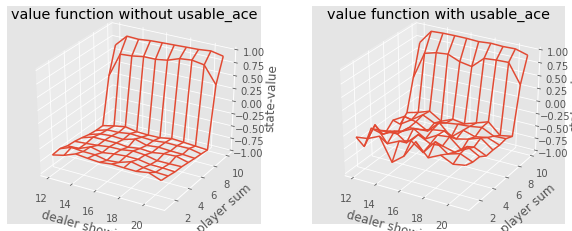

In [17]:
def plot_blackjack(V, ax1, ax2):
  player_sum = np.arange(12, 21 + 1)
  dealer_show = np.arange(1, 10 + 1)
  usable_ace = np.array([False, True])

  state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))
  for i, player in enumerate(player_sum):
    for j, dealer in enumerate(dealer_show):
      for k, ace in enumerate(usable_ace):
        state_values[i, j, k] = V[player, dealer, ace]
  
  X, Y = np.meshgrid(player_sum, dealer_show)

  ax1.plot_wireframe(X, Y, state_values[:, :, 0])
  ax2.plot_wireframe(X, Y, state_values[:, :, 1])
  for ax in ax1, ax2:
    ax.set_zlim(-1, 1)
    ax.set_ylabel('player sum')
    ax.set_xlabel('dealer showing')
    ax.set_zlabel('state-value')

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable_ace')
axes[1].set_title('value function with usable_ace')
plot_blackjack(value, axes[0], axes[1])